In [117]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase
using CSV
using DataFrames

In [118]:
t_start = time();

In [119]:
### Todo
## mu = 1.2

## m_0 = -1,0,1

## Parameters:

In [120]:
t0 = 1.0;
t = 1.0;
m_0 = 1.0;
mu = 1.2;
Delta = 0.5;

x_periodic = 0;
y_periodic = 0;

L = 60;

Lx = L;
Ly = L;

exportdata=1;

Equation of two lines are $y = mx + c_1$ and $y = mx + c_2$

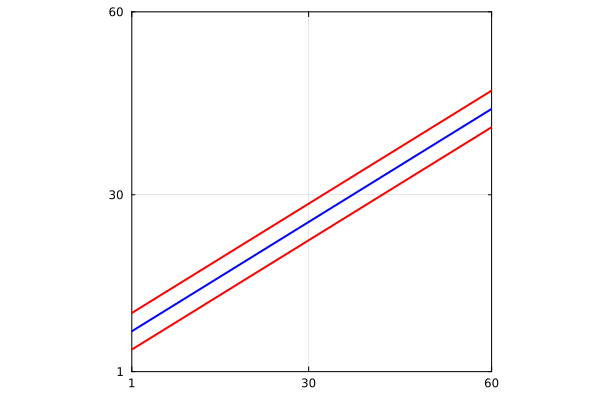

In [121]:
m = (-1+sqrt(5))/2
# m=2/3;
c1 = 4
c2 = 10

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

function line_middle(x::Float64)
    return (line_up(x) + line_down(x))/2
end

line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plot(line_x,line_down_y,color="red",width=2, xlims=(1,Lx),ylims=(1,Ly),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plot!(line_x,line_up_y,color="red",width=2)
plot!(line_x,line_middle.(line_x),color="blue",width=2)

In [122]:
points_x_array = range(1, L,L)
points_y_array = range(1, L,L)

points2 = zeros(2*L^2)
for ii = 1:L
    for jj = 1:L
        points2[2*((jj-1)*L+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*L+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,L^2, L^2)

1.0:1.0:3600.0

### Now we isolate the PTB points

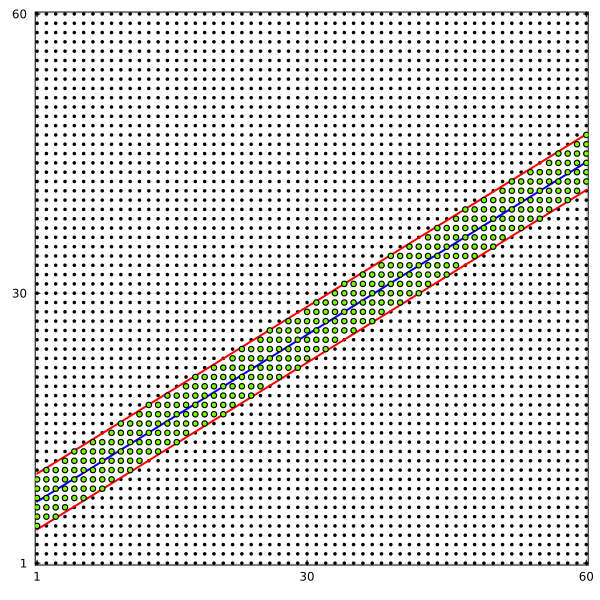

In [123]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,L^2,L^2))
for ii = 1:L^2
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, 
                    xlims=[0.8,L+0.2], ylims=[0.8,L+0.2],color="black",markersize=2, frame=:box, framestyle=:thick, xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly], size=(600,600))
plt_lattice=plot!(line_x,line_down_y,color="red",width=2)
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=plot!(line_x,line_middle.(line_x),color="blue",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="lawngreen",aspect_ratio=1,legend=false,markersize=3)

## Percentage of sites in PTB

In [124]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/L^2, " %")

Number of sites in PTB = 360
Amount of sites in PTB = 10.0 %


In [125]:
println(PTB_index)

[241, 301, 302, 303, 361, 362, 363, 364, 421, 422, 423, 424, 425, 426, 481, 482, 483, 484, 485, 486, 487, 488, 541, 542, 543, 544, 545, 546, 547, 548, 549, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 664, 665, 666, 667, 668, 669, 670, 671, 672, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 849, 850, 851, 852, 853, 854, 855, 856, 857, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 

## Coordinates of projected sites

### Equation of line_down is $y=mx + c_1$
### Equation of projector line is, $y-y_1 = (-1/m).(x-x_1)$, where $(x_1,y_1)$ is the coordinate of the site
### The two lines intersect at $((m.y_1 + x_1 - m.c_1)/(m^2 + 1), (m^2.y_1 + m.x_1 + c_1)/(m^2 + 1))$

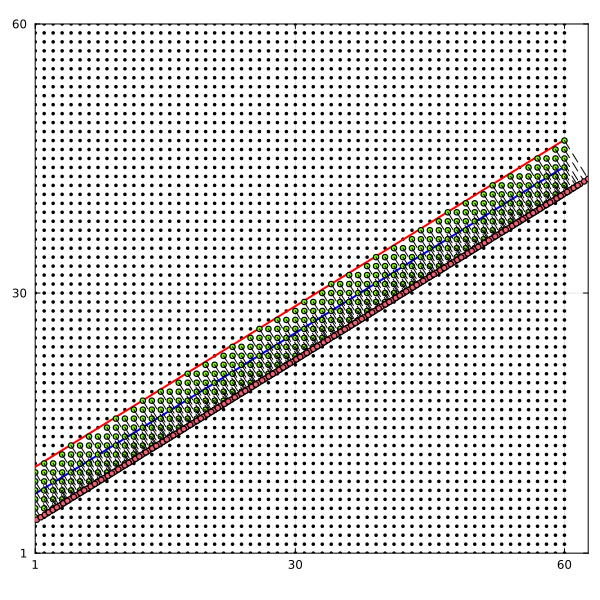

In [126]:
projected_points_PTB_array_x = (m*points_PTB_array_y + points_PTB_array_x - m*ones(N_PTB)*c1)/(m^2 + 1);
projected_points_PTB_array_y = m*projected_points_PTB_array_x + c1 * ones(N_PTB);

## This array contains distance along the line
## This should be x coordinates on the line * sec(theta), where the slope is tan(theta) = m
distance_along_projected_line = projected_points_PTB_array_x * sqrt(m^2 +1)

for ii = 1:N_PTB
    line_projected_x = [points_PTB_array_x[ii],projected_points_PTB_array_x[ii]]
    line_projected_y = [points_PTB_array_y[ii],projected_points_PTB_array_y[ii]]
    plt_lattice=plot!(line_projected_x,line_projected_y,linestyle=:dash, color="black")
end
plt_lattice=scatter!(projected_points_PTB_array_x,projected_points_PTB_array_y, 
            xlims=(1,maximum(vcat(projected_points_PTB_array_x,Lx))), ylims=(1,maximum(vcat(projected_points_PTB_array_y,Ly))), markersize=3)
display(plt_lattice)

## Generate Parent Hamiltonian

In [127]:
include("generate_matrices1D.jl")
include("generate_matrices2D.jl")
include("angmom.jl")

generate_spin_matrices (generic function with 1 method)

In [128]:
println("t = ",t)
println("m_0 = ", m_0)
println("Delta = ",Delta)
println("mu = ", mu)
println("Lx = ", Lx)
println("Ly = ", Ly)

t = 1.0
m_0 = 1.0
Delta = 0.5
mu = 1.2
Lx = 60
Ly = 60


In [129]:
if(x_periodic^2 != x_periodic || y_periodic^2 != y_periodic)
    println("x_periodic and y_periodic must be 0 or 1")
    println("You entered x_periodic = ", x_periodic, " y_periodic = ", y_periodic)
    return
end

In [130]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_13 = kron(sigma_x,sigma_z);
gamma_30 = kron(sigma_z, eye2);
gamma_31 = kron(sigma_z, sigma_x);
gamma_32 = kron(sigma_z, sigma_y);
gamma_33 = kron(sigma_z, sigma_z);

In [131]:
const_2D, CX2D, SX2D, CY2D, SY2D, CXCY2D, SXCY2D, CXSY2D = generate_matrices_2D(Lx,Ly,x_periodic,y_periodic)

CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Verified: Building Block Matrices are Hermitian


Nothing

In [132]:
h_SC_chern = t*kron(SX2D,gamma_01) + t*kron(SY2D,gamma_02) + kron(m_0*const_2D- t0*(CX2D + CY2D),gamma_03) + Delta*kron(const_2D,gamma_13) -mu*kron(const_2D,gamma_30)

## Here is the Hamiltonian of regular Chern insulator for quick check
#h_SC_chern = Hermitian(t*kron((SX2D),sigma_x) + t*kron(SY2D,sigma_y) + kron((m_0)*const_2D - t0*(CX2D + CY2D),sigma_z))

if(Hermitian_Check(h_SC_chern) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

### The following (commented out to save execution time) is the code for local Chern marker in the parent lattice

In [133]:
# XList_parent = kron(range(1,1,Ly),range(1,Lx,Lx))
# YList_parent = kron(range(1,Ly,Ly),range(1,1,Lx))


# X1_parent = kron(diagm(XList_parent),eye2,eye2)
# Y1_parent = kron(diagm(YList_parent),eye2,eye2)

# (energy_eigenvalues_parent, eigenstates_parent) = eigen(h_SC_chern);
# filled_eigenstates_parent = eigenstates_parent[:,1:2*Lx*Ly];

# ## We create a projector P, which projects to the space of filled eigenstates (half-filled)
# P_parent = conj(filled_eigenstates_parent) * transpose(filled_eigenstates_parent)
# ## Q projects to the empty eigenstates
# Q_parent = kron(const_2D,eye2,eye2) - P_parent


# ## We define the local Chern operators, whose diagonal elements in the Wannier basis are the local Chern numbers per orbital
# ChernMatrix_parent = -4*pi*imag(P_parent * X1_parent * Q_parent * Y1_parent * P_parent);
# ChernMatrixDiagonalList_parent = diag(ChernMatrix_parent)
# ChernMatrixSiteWiseList_parent = zeros(Lx*Ly)
# ## Here we add the two chern numbers for the two orbitals
# for ii = 1:Lx*Ly
#     ChernMatrixSiteWiseList_parent[ii] = ChernMatrixDiagonalList_parent[4*(ii-1) + 1] + ChernMatrixDiagonalList_parent[4*(ii-1) + 2] + ChernMatrixDiagonalList_parent[4*(ii-1) + 3] + ChernMatrixDiagonalList_parent[4*(ii-1) + 4]
# end

# println(ChernMatrixSiteWiseList_parent)

In [134]:
# println("size eigenstates_parent = ", size(eigenstates_parent))
# println("size filled_eigenstates_parent = ", size(filled_eigenstates_parent))
# println("size P = ", size(P_parent))

In [135]:
# plt1 = scatter(1:4*Lx*Ly, energy_eigenvalues_parent)
# display(plt1)

In [136]:
# Gap_parent = minimum(abs.(energy_eigenvalues_parent))

### I plot the local Chern marker at the middle line $y = L_y/2$ of the lattice

In [137]:
# ### We will plot the local Chern marker along the line y = Ly/2
# plt_Chern_parent = scatter(1:Lx, ChernMatrixSiteWiseList_parent[(Int(round(Ly/2)) - 1)*Lx+1:(Int(round(Ly/2)) - 1)*Lx+Lx], ylims=(-3,3), 
#                 xlabel="x", ylabel="Perent lattice Local Chern marker at y=L/2", legend=:none,
#                 title=string("Lx = ", string(Lx), ", t = ", string(t), ", Delta = ", string(Delta), ", m0 = ", string(m_0), ", mu = ", string(mu)))
# display(plt_Chern_parent)

## Clear Variables

In [138]:
const_2D= Nothing
CX2D= Nothing
SX2D= Nothing
CY2D= Nothing
SY2D= Nothing
CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Nothing

## Now generate PTB Hamiltonian

In [139]:
PTB_orbital_index = ones(4*N_PTB);
for ii = 1:N_PTB
    PTB_orbital_index[4*ii-3] = 4*PTB_index[ii]-3
    PTB_orbital_index[4*ii-2] = 4*PTB_index[ii]-2
    PTB_orbital_index[4*ii-1] = 4*PTB_index[ii]-1
    PTB_orbital_index[4*ii] = 4*PTB_index[ii]
end
println(PTB_orbital_index)

[961.0, 962.0, 963.0, 964.0, 1201.0, 1202.0, 1203.0, 1204.0, 1205.0, 1206.0, 1207.0, 1208.0, 1209.0, 1210.0, 1211.0, 1212.0, 1441.0, 1442.0, 1443.0, 1444.0, 1445.0, 1446.0, 1447.0, 1448.0, 1449.0, 1450.0, 1451.0, 1452.0, 1453.0, 1454.0, 1455.0, 1456.0, 1681.0, 1682.0, 1683.0, 1684.0, 1685.0, 1686.0, 1687.0, 1688.0, 1689.0, 1690.0, 1691.0, 1692.0, 1693.0, 1694.0, 1695.0, 1696.0, 1697.0, 1698.0, 1699.0, 1700.0, 1701.0, 1702.0, 1703.0, 1704.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 2161.0, 2162.0, 2163.0, 2164.0, 2165.0, 2166.0, 2167.0, 2168.0, 2169.0, 2170.0, 2171.0, 2172.0, 2173.0, 2174.0, 2175.0, 2176.0, 2177.0, 2178.0, 2179.0, 2180.0, 2181.0, 2182.0, 2183.0, 2184.0, 2185.0, 2186.0, 2187.0, 2188.0, 2189.0, 2190.0, 2191.0, 2192.0, 2193.0, 2194.0, 2195.0, 2196.0, 2405.0, 240

In [140]:
outside_orbital_index = setdiff(1:4*Lx*Ly,PTB_orbital_index);
println(outside_orbital_index)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

In [141]:
NOrbitalsOutside = 4*Lx*Ly - 4*N_PTB

12960

In [142]:
NOrbitalsInside = 4*N_PTB

1440

In [143]:
H_PTB_renor = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_11 = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_22 = zeros(NOrbitalsOutside,NOrbitalsOutside)*im;

H_21 = zeros(NOrbitalsOutside,NOrbitalsInside)*im;

H_12 = zeros(NOrbitalsInside,NOrbitalsOutside)*im;

In [144]:
for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsInside
        H_11[ii,jj] = h_SC_chern[Int(PTB_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

In [145]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsOutside
        H_22[ii,jj] = h_SC_chern[Int(outside_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [146]:
Threads.@threads for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsOutside
        H_12[ii,jj] = h_SC_chern[Int(PTB_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [147]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsInside
        H_21[ii,jj] = h_SC_chern[Int(outside_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

## Clear variables

In [148]:
h_SC_chern= Nothing

Nothing

## Add a small constant matrix to invert matrix H_22 in case its eigenvalue is 0

In [149]:
H_PTB_renor = H_11 #- Hermitian(H_12*inv(Hermitian(H_22 + 10^(-8)*Matrix(1.0I, NOrbitalsOutside, NOrbitalsOutside)))*H_21);

1440×1440 Matrix{ComplexF64}:
 -0.2+0.0im   0.0+0.0im   0.5+0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -2.2+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.5+0.0im   0.0+0.0im   2.2+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -0.5+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
 -0.5+0.0im  -0.5+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.5+0.0im   0.5+0.0im   0.0+0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im  -0.5+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.5+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
     ⋮                               ⋱                          
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.5+0.0im   0.0+0.0im   0.0+0.0im
  0.0

In [150]:
H_11= Nothing
H_12= Nothing
H_21= Nothing
H_22= Nothing

Nothing

In [151]:
if(Hermitian_Check(H_PTB_renor) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

### Calculation of local Chern Marker

In [152]:
## Store the x and y coordinates of the sites in PTB
YList_PTB = ceil.(PTB_index/Lx);
XList_PTB = PTB_index - (YList_PTB - ones(N_PTB))*Lx;

In [153]:
## Kronecker product to get the orbitals
XListKron_PTB = kron(XList_PTB,[1,1,1,1]);
YListKron_PTB = kron(YList_PTB,[1,1,1,1]);

X1_PTB = diagm(XListKron_PTB);
Y1_PTB = diagm(YListKron_PTB);

In [154]:
(energy_eigenvalues_PTB, eigenstates_PTB) = eigen(H_PTB_renor);
#println(size(eigenstates))
filled_eigenstates_PTB = eigenstates_PTB[:,1:2*N_PTB]
## We create a projector P, which projects to the space of filled eigenstates (half-filled)
P_PTB = conj(filled_eigenstates_PTB) * transpose(filled_eigenstates_PTB)
## Q projects to the empty eigenstates
Q_PTB = kron(diagm(ones(N_PTB)),eye2,eye2) - P_PTB;
## We define the local Chern operators, whose diagonal elements in the Wannier basis are the local Chern numbers per orbital
ChernMatrix_PTB = -4*pi*imag(P_PTB * X1_PTB * Q_PTB * Y1_PTB * P_PTB);
ChernMatrixDiagonalList_PTB = diag(ChernMatrix_PTB)
ChernMatrixSiteWiseList_PTB = zeros(Lx*Ly)
## Here we add the two chern numbers for the two orbitals
for ii = 1:N_PTB
    ChernMatrixSiteWiseList_PTB[ii] = ChernMatrixDiagonalList_PTB[4*(ii-1) + 1] + ChernMatrixDiagonalList_PTB[4*(ii-1) + 2] + ChernMatrixDiagonalList_PTB[4*(ii-1) + 3] + ChernMatrixDiagonalList_PTB[4*(ii-1) + 4]
end

In [155]:
size(kron(diagm(ones(N_PTB)),eye2,eye2))

(1440, 1440)

In [156]:
size(P_PTB)

(1440, 1440)

In [157]:
println("size H_PTB_renor = ", size(H_PTB_renor))
println("size eigenstates = ", size(eigenstates_PTB))
println("size filled_eigenstates = ", size(filled_eigenstates_PTB))
println("size P = ", size(P_PTB))

size H_PTB_renor = (1440, 1440)
size eigenstates = (1440, 1440)
size filled_eigenstates = (1440, 720)
size P = (1440, 1440)


In [158]:
Gap_PTB = 2*minimum(abs.(energy_eigenvalues_PTB))

0.013396782300029423

In [159]:
energy_eigenvalues_PTB[Int(round(NOrbitalsInside/2))],energy_eigenvalues_PTB[Int(round(NOrbitalsInside/2)-1)]

(-0.006698391150014711, -0.007912390007259244)

In [160]:
N_PTB, NOrbitalsInside

(360, 1440)

## Filename

In [161]:
# Define the folder path (relative or absolute)
folder_path = "data/topo_super/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "H11_t0=$(t0)_t=$(t)_m_0=$(m_0)_mu=$(mu)_Delta=$(Delta)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(L)_m=$(m)_c1=$(c1)_c2=$(c2).csv"

"H11_t0=1.0_t=1.0_m_0=1.0_mu=1.2_Delta=0.5_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=4_c2=10.csv"

## Bulk boundary correspondence

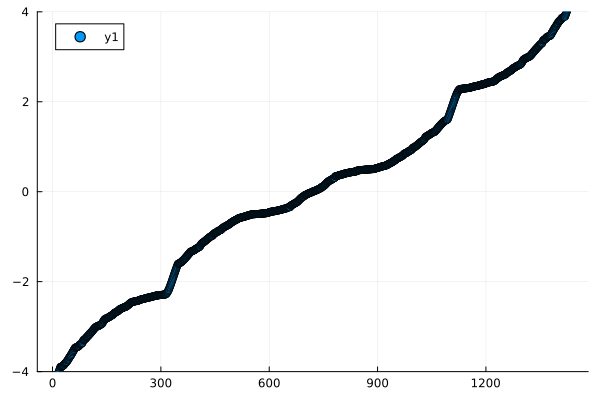

In [162]:
plt2 = scatter(1:NOrbitalsInside, energy_eigenvalues_PTB, ylims=(-4,4))
display(plt2)

In [163]:
isdir(string(folder_path,"energies/")) || mkdir(string(folder_path,"energies/"))

if exportdata==1
    CSV.write(string(folder_path,"energies/",filename), (; energy_eigenvalues_PTB),writeheader=false)
end

"data/topo_super/energies/H11_t0=1.0_t=1.0_m_0=1.0_mu=1.2_Delta=0.5_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=4_c2=10.csv"

In [164]:
function state_to_real_space_LDoS(v::Array{ComplexF64})
    n_sites = Int(size(v)[1]/4)
    prob_dist = zeros(n_sites)
    for ii = 1:n_sites
        prob_dist[ii] = abs(v[4*ii-3])^2 +  abs(v[4*ii-2])^2 + abs(v[4*ii-1])^2 + abs(v[4*ii])^2
    end
    return prob_dist
end 

state_to_real_space_LDoS (generic function with 1 method)

## Plot of LDoS of topological states of PTB

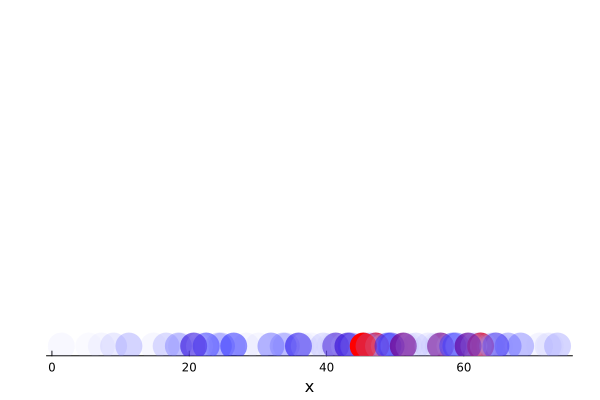

In [165]:
#boundary_state_nearest_zero = eigenstates_PTB[:,N_PTB];
probability_boundary_state = state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB]) + state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB+1]);

color_map = cgrad([RGB(1,1,1), RGB(0,0,1), RGB(1,0,0)])

# Calculate alphas based on y values
function alpha_function(p, pmax)
    if p < pmax/10
        return 0
    else
        return p/pmax
    end
end
alphas = alpha_function.(probability_boundary_state, maximum(probability_boundary_state))

#plt_PTB_BD_states = scatter(distance_along_projected_line, probability_boundary_state)
plt_PTB_BD_states = scatter(distance_along_projected_line, ones(N_PTB), 
                            zcolor=probability_boundary_state, legend=false, xlabel="x", colorbar_title="Value",
                            c=color_map, ms=15, seriesalpha=alphas, markerstrokewidth=0, grid=false,
                            yaxis=false)

display(plt_PTB_BD_states)

In [166]:
isdir(string(folder_path,"LDOS/")) || mkdir(string(folder_path,"LDOS/"))

if exportdata==1
    CSV.write(string(folder_path,"LDOS/",filename), (; probability_boundary_state),writeheader=false)
end

"data/topo_super/LDOS/H11_t0=1.0_t=1.0_m_0=1.0_mu=1.2_Delta=0.5_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=4_c2=10.csv"

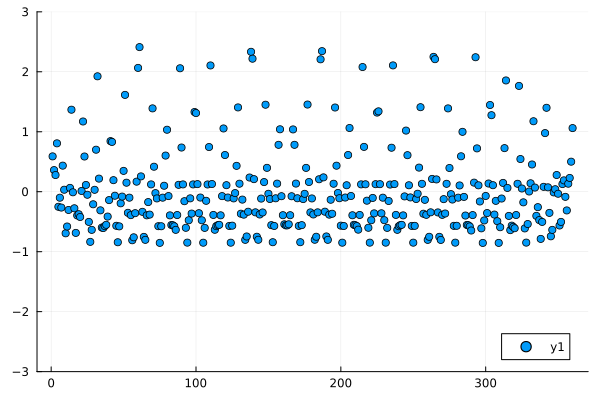

In [167]:
plt_PTB_Chern_marker_sitewise = scatter(1:N_PTB, ChernMatrixSiteWiseList_PTB,ylims=(-3,3),yticks=range(-3,3,7))

### Now I isolate sites on the middle line, and plot their local Chern markers

### For each value of x, I find the site on the PTB closest to the middle line

#### Note that this works only if PTB is thick enough to have more than Lx points

In [168]:
### I generate an array which are the points closest to the middle line
middle_line_x_coordinates = 1:Lx;
middle_line_y_coordinates = round.(line_middle.(float(middle_line_x_coordinates)));

In [169]:
Indices_of_PTB_middle_points = zeros(Lx);
Chern_marker_PTB_list_middle_points = zeros(Lx);

for ii = 1:Lx
    for jj = 1:N_PTB
        if (XList_PTB[jj] == middle_line_x_coordinates[ii]) && (YList_PTB[jj] == middle_line_y_coordinates[ii])
            Indices_of_PTB_middle_points[ii] = PTB_index[jj];
            Chern_marker_PTB_list_middle_points[ii] = ChernMatrixSiteWiseList_PTB[jj];
        end
    end
end


In [170]:
mode_chern = modes(round.(Chern_marker_PTB_list_middle_points))[1]

-1.0

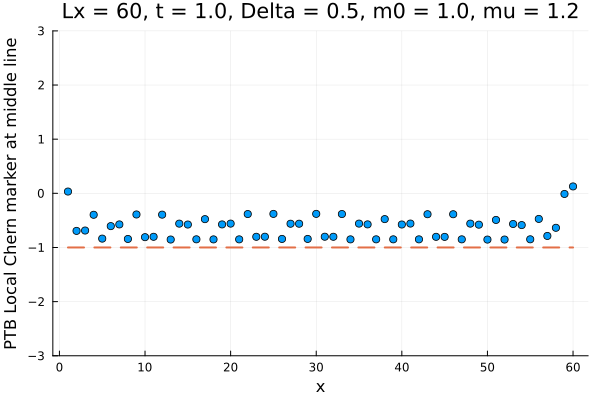

In [171]:
### We will plot the local Chern marker along the line y = Ly/2
plt_Chern_PTB = scatter(1:Lx, Chern_marker_PTB_list_middle_points, ylims=(-3,3), legend=:none,
                xlabel="x", ylabel="PTB Local Chern marker at middle line", 
                title=string("Lx = ", string(Lx), ", t = ", string(t), ", Delta = ", string(Delta), ", m0 = ", string(m_0), ", mu = ", string(mu)))
plt_Chern_PTB = plot!(1:Lx, mode_chern*ones(Lx), linestyle=:dash, thickness=2, linewidth=2)
display(plt_Chern_PTB)

In [172]:
isdir(string(folder_path,"local_chern/")) || mkdir(string(folder_path,"local_chern/"))

if exportdata==1
    CSV.write(string(folder_path,"local_chern/",filename), (; Chern_marker_PTB_list_middle_points),writeheader=false)
end

"data/topo_super/local_chern/H11_t0=1.0_t=1.0_m_0=1.0_mu=1.2_Delta=0.5_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=4_c2=10.csv"

In [173]:
t_end=time();

In [174]:
println("time taken = ", t_end - t_start," seconds")

time taken = 64.69767904281616 seconds
